<a href="https://colab.research.google.com/github/kohithaA0/IBM-SKILLS-BUILD-CYBERSECURITY-PROJECT/blob/main/epicsmlmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


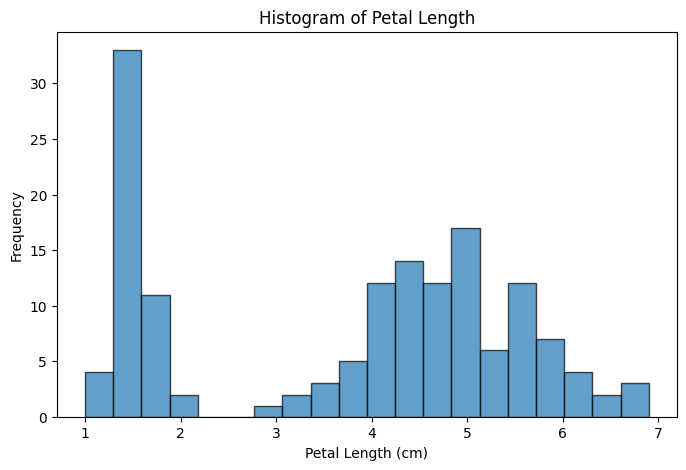

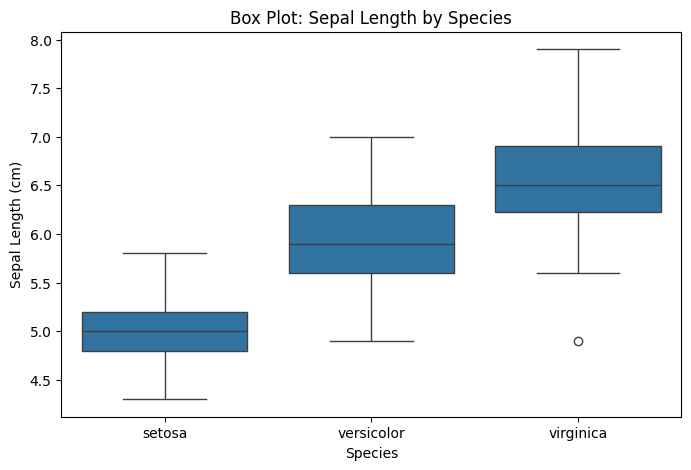

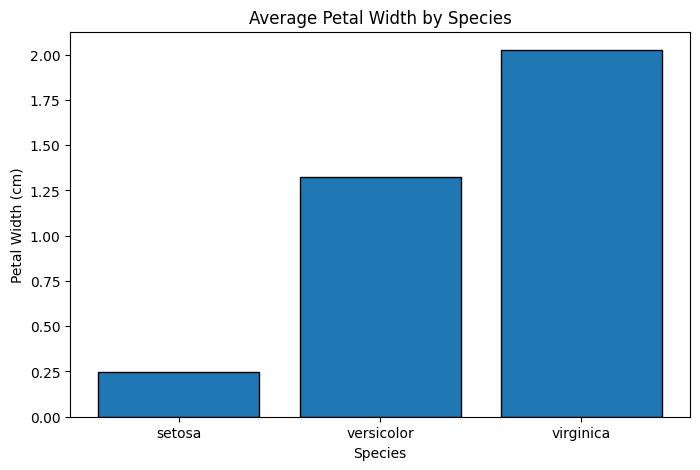

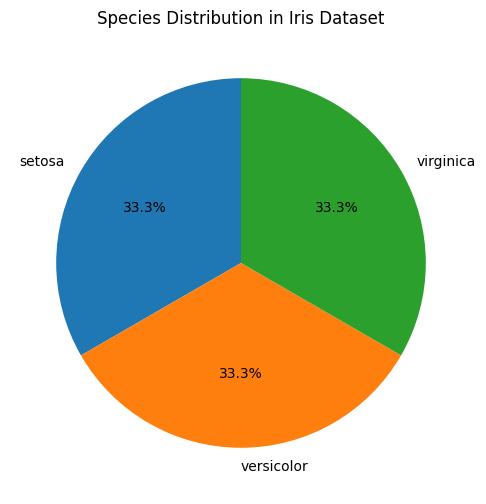

In [ ]:
#week16
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load iris dataset
iris = sns.load_dataset("iris")

print("Column names:", list(iris.columns))

# ============================
# 1️⃣ HISTOGRAM – Petal Length
# ============================
plt.figure(figsize=(8, 5))
plt.hist(iris['petal_length'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# ====================================
# 2️⃣ BOX PLOT – Sepal Length by Species
# ====================================
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.title("Box Plot: Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

# ====================================
# 3️⃣ BAR CHART – Average Petal Width
# ====================================
avg_petal_width = iris.groupby("species")["petal_width"].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_petal_width.index, avg_petal_width.values, edgecolor='black')
plt.title("Average Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.show()

# ====================================
# 4️⃣ PIE CHART – Species Distribution
# ====================================
species_count = iris["species"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(species_count,
        labels=species_count.index,
        autopct="%1.1f%%",
        startangle=90)
plt.title("Species Distribution in Iris Dataset")
plt.show()

Dataset Loaded Successfully:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dissimilarity Matrix (Euclidean Distance):
[[0.   0.54 0.51 0.65 0.14]
 [0.54 0.   0.3  0.33 0.61]
 [0.51 0.3  0.   0.24 0.51]
 [0.65 0.33 0.24 0.   0.65]
 [0.14 0.61 0.51 0.65 0.  ]]


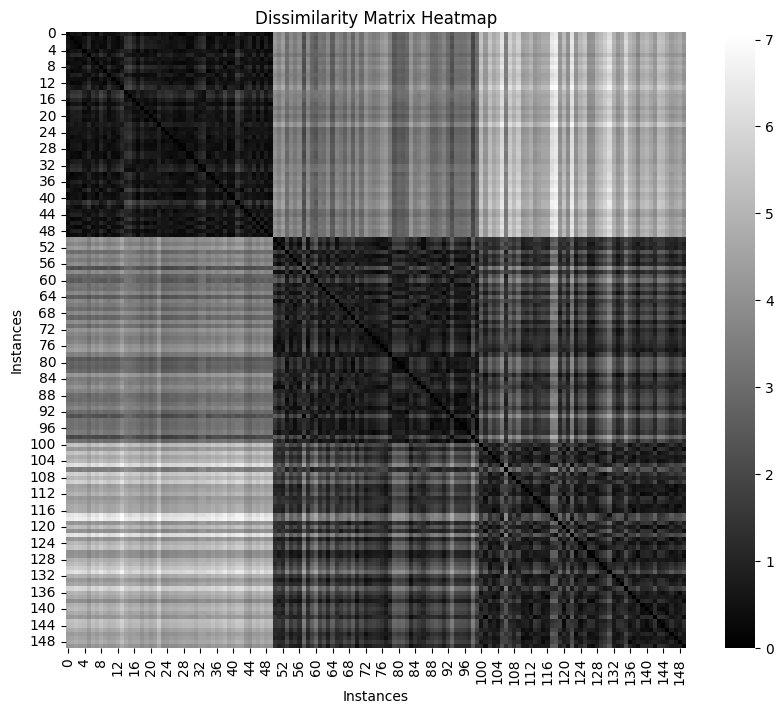

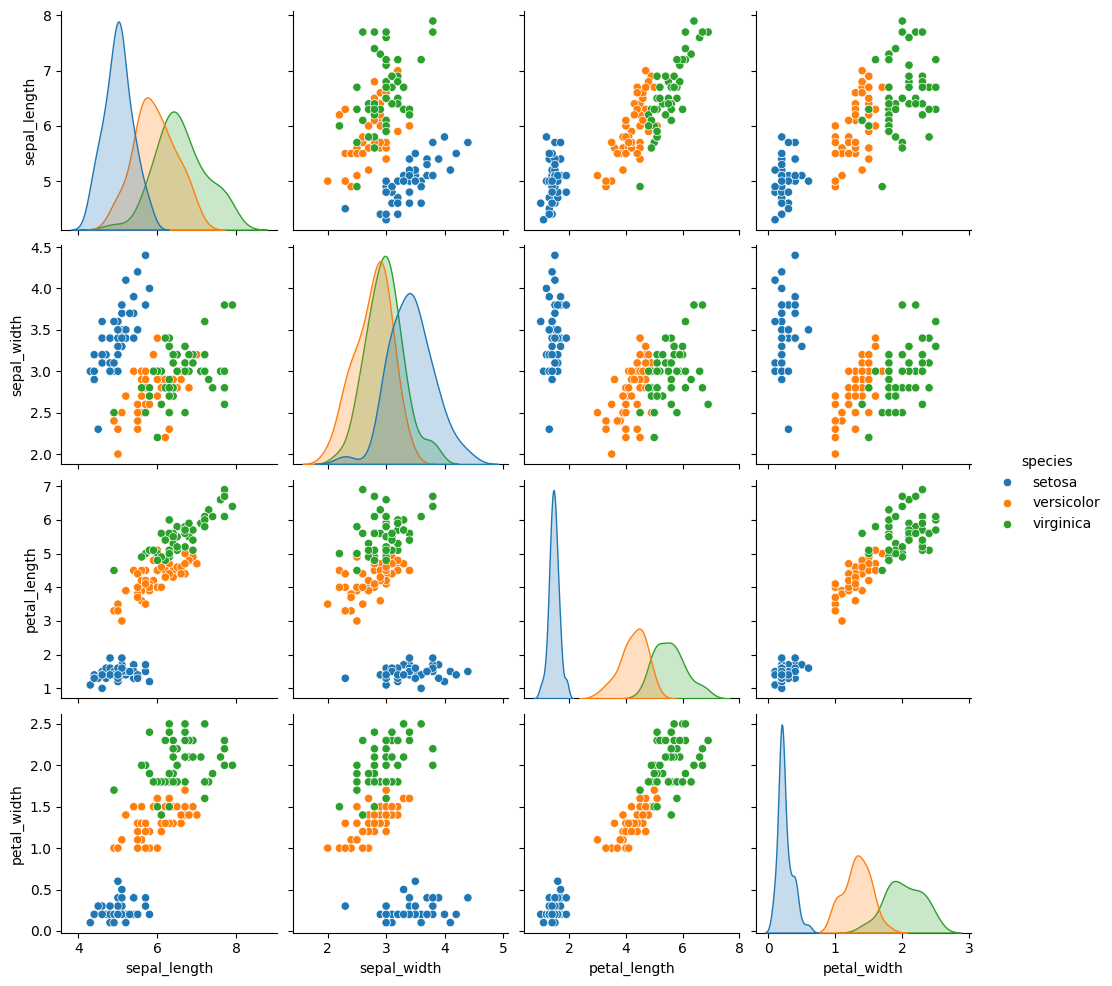


Summary Statistics for Numeric Features:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


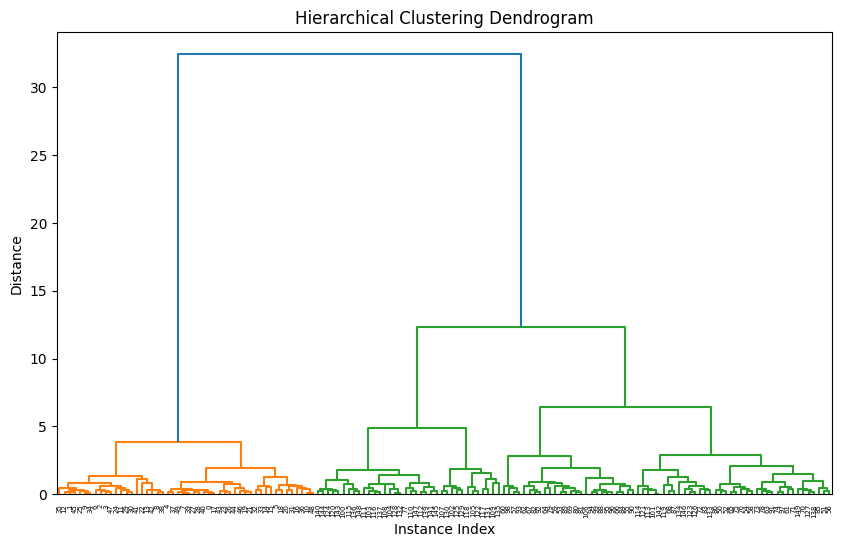

In [ ]:
#week15
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# -----------------------------
# 1. LOAD IRIS DATASET
# -----------------------------
iris = sns.load_dataset("iris")

print("Dataset Loaded Successfully:")
print(iris.head())


# -----------------------------
# 2. CALCULATE DISIMMILARITY MATRIX (EUCLIDEAN)
# -----------------------------
features = iris.drop("species", axis=1)

# pairwise Euclidean distance
distance_matrix = squareform(pdist(features, metric='euclidean'))

print("\nDissimilarity Matrix (Euclidean Distance):")
print(np.round(distance_matrix[:5, :5], 2))   # print first 5 rows (clean view)


# -----------------------------
# 3. HEATMAP OF DISIMMILARITY MATRIX
# -----------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap="gray")
plt.title("Dissimilarity Matrix Heatmap")
plt.xlabel("Instances")
plt.ylabel("Instances")
plt.show()


# -----------------------------
# 4. PAIRPLOT (Scatterplot Matrix)
# -----------------------------
sns.pairplot(iris, hue="species")
plt.show()


# -----------------------------
# 5. SUMMARY STATISTICS (NUMERIC COLUMNS)
# -----------------------------
print("\nSummary Statistics for Numeric Features:")
print(iris.describe())


# -----------------------------
# 6. HIERARCHICAL CLUSTERING DENDROGRAM
# -----------------------------
linked = linkage(features, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Instance Index")
plt.ylabel("Distance")
plt.show()

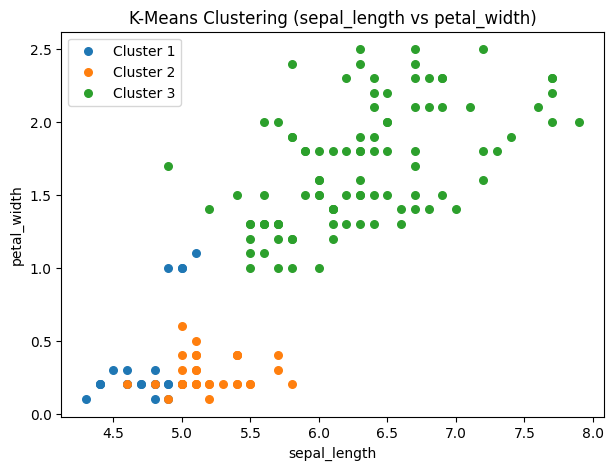

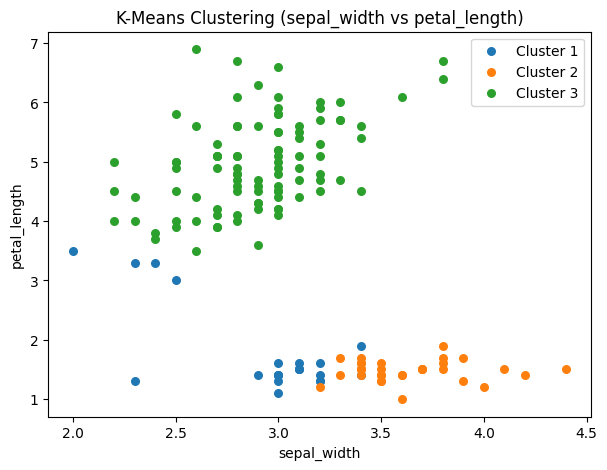

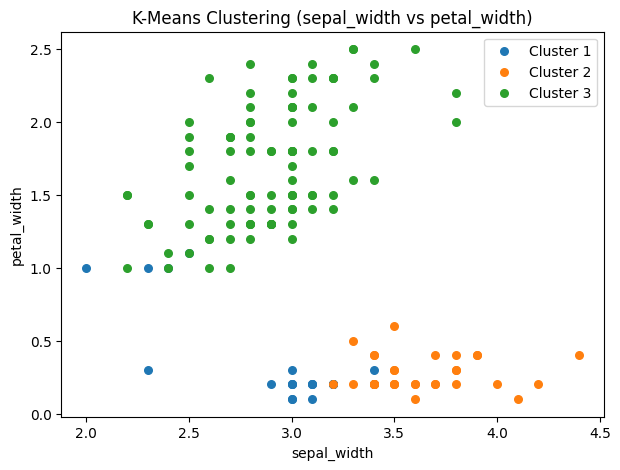

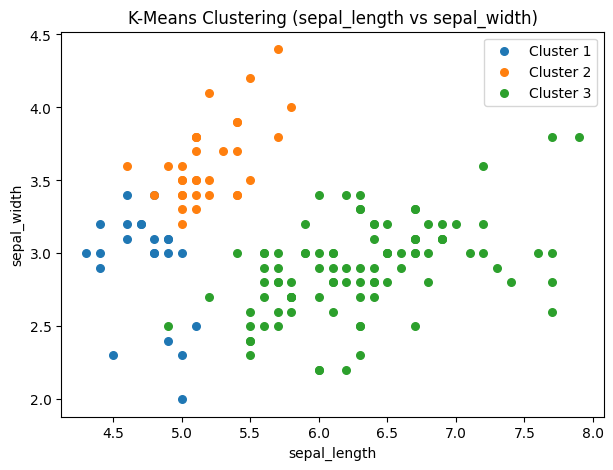

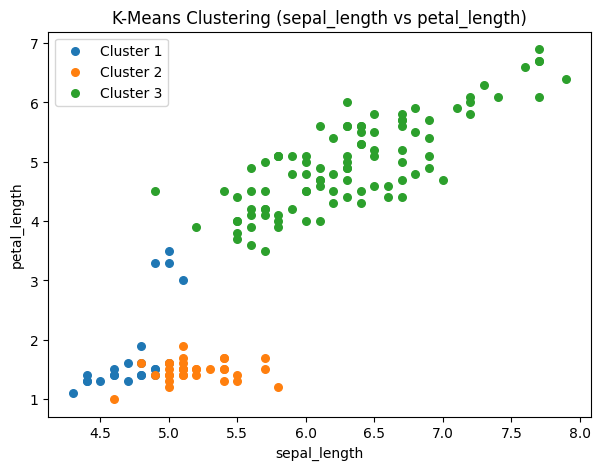

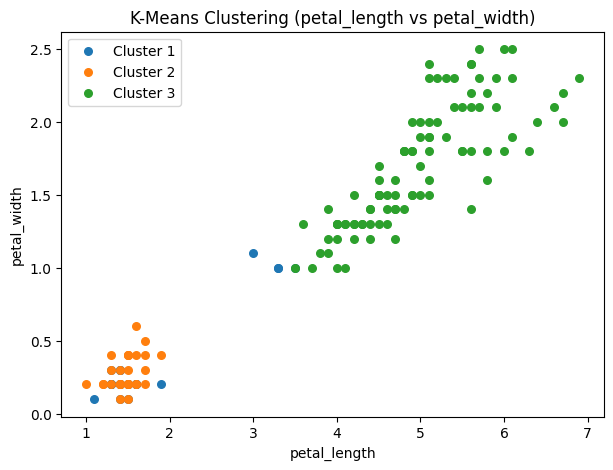

In [ ]:
#week14/13
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

# ---------------------------
# Load Iris Dataset
# ---------------------------
iris = sns.load_dataset("iris")
X = iris.iloc[:, :4].values  # only numeric columns

# ---------------------------
# Euclidean Distance Function
# ---------------------------
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# ---------------------------
# K-Means From Scratch
# ---------------------------
def kmeans(X, k, max_iters=100):
    # Step 1: Pick k random points as initial centroids
    centroids = X[sample(range(len(X)), k)]

    for _ in range(max_iters):
        # Step 2: Assign each point to nearest centroid
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean(point, c) for c in centroids]
            cluster_id = np.argmin(distances)
            clusters[cluster_id].append(point)

        # Step 3: Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])

        # Stop if centroids don't move
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Final labels
    labels = []
    for point in X:
        distances = [euclidean(point, c) for c in centroids]
        labels.append(np.argmin(distances))

    return np.array(centroids), np.array(labels)

# ---------------------------
# Run K-Means for k = 3
# ---------------------------
centroids, labels = kmeans(X, 3)
iris["cluster"] = labels

# ---------------------------
# Function to Plot Clusters
# ---------------------------
def plot_clusters(x_col, y_col):
    plt.figure(figsize=(7, 5))
    for cluster_id in range(3):
        plt.scatter(
            iris[iris.cluster == cluster_id][x_col],
            iris[iris.cluster == cluster_id][y_col],
            label=f"Cluster {cluster_id+1}",
            s=30
        )
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"K-Means Clustering ({x_col} vs {y_col})")
    plt.legend()
    plt.show()

# ---------------------------
# Generate ALL CLUSTER PLOTS
# ---------------------------
plot_clusters("sepal_length", "petal_width")
plot_clusters("sepal_width", "petal_length")
plot_clusters("sepal_width", "petal_width")

plot_clusters("sepal_length", "sepal_width")
plot_clusters("sepal_length", "petal_length")
plot_clusters("petal_length", "petal_width")

In [ ]:
#week12/9
from itertools import combinations

transactions = []
n = int(input("Enter number of transactions: "))

for i in range(n):
    items = input(f"Enter items for transaction {i+1} (comma separated): ").split(',')
    transactions.append({x.strip().title() for x in items if x.strip()})

min_support = float(input("Enter minimum support (0-1): "))
min_confidence = float(input("Enter minimum confidence (0-1): "))

def support(itemset):
    count = sum(1 for t in transactions if itemset.issubset(t))
    return count / len(transactions)

def apriori():
    items = sorted({i for t in transactions for i in t})
    itemsets = [{i} for i in items]
    frequent = []
    while itemsets:
        next_sets = []
        for s in itemsets:
            sup = support(s)
            if sup >= min_support:
                frequent.append((s, sup))
                next_sets.append(s)
        itemsets = [set(c) for c in combinations(items, len(next_sets[0]) + 1)] if next_sets else []
    return frequent

def generate_rules(frequent):
    rules = []
    for s, sup in frequent:
        if len(s) > 1:
            for i in range(1, len(s)):
                for A in combinations(s, i):
                    A, B = set(A), s - set(A)
                    conf = support(s) / support(A)
                    if conf >= min_confidence:
                        rules.append((A, B, sup, conf))
    return rules

frequent = apriori()
rules = generate_rules(frequent)

print("\n=== Transactions ===")
for t in transactions:
    print(t)

print("\n=== Frequent Itemsets ===")
for s, sup in frequent:
    print(f"{s} -> Support: {sup:.2f}")

print("\n=== Association Rules ===")
for A, B, sup, conf in rules:
    print(f"{A} => {B} (Support: {sup:.2f}, Confidence: {conf:.2f})")

Enter number of transactions: 5
Enter items for transaction 1 (comma separated): milk,bread,butter
Enter items for transaction 2 (comma separated): milk,bread
Enter items for transaction 3 (comma separated): milk,bread,butter
Enter items for transaction 4 (comma separated): milk,bread
Enter items for transaction 5 (comma separated): bread,butter
Enter minimum support (0-1): 0.6
Enter minimum confidence (0-1): 0.7

=== Transactions ===
{'Bread', 'Milk', 'Butter'}
{'Bread', 'Milk'}
{'Bread', 'Milk', 'Butter'}
{'Bread', 'Milk'}
{'Bread', 'Butter'}

=== Frequent Itemsets ===
{'Bread'} -> Support: 1.00
{'Butter'} -> Support: 0.60
{'Milk'} -> Support: 0.80
{'Bread', 'Butter'} -> Support: 0.60
{'Bread', 'Milk'} -> Support: 0.80

=== Association Rules ===
{'Butter'} => {'Bread'} (Support: 0.60, Confidence: 1.00)
{'Bread'} => {'Milk'} (Support: 0.80, Confidence: 0.80)
{'Milk'} => {'Bread'} (Support: 0.80, Confidence: 1.00)


Accuracy: 0.8
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



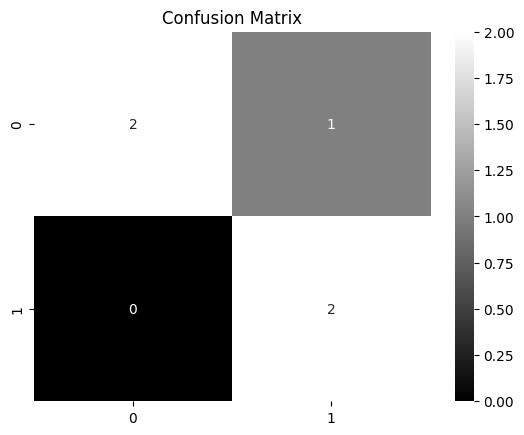

/tmp/ipython-input-378829003.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Precision","Recall","F1"], y=metrics, palette='gray')


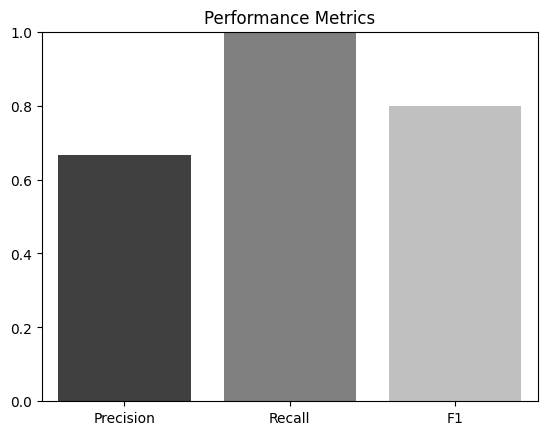

In [ ]:
#week11
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Dataset
# ---------------------------
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 28, 33, 38, 43, 48, 53, 58, 63],
    'Income': [40, 50, 60, 70, 80, 90, 100, 110, 42, 52, 62, 72, 82, 92, 102, 112],
    'Buys_Computer': ['No','No','Yes','Yes','Yes','No','Yes','No','No','No','Yes','Yes','Yes','No','Yes','No']
})

df['Buys_Computer'] = df['Buys_Computer'].map({'No':0, 'Yes':1})

X = df[['Age', 'Income']]
y = df['Buys_Computer']

# ---------------------------
# Train–Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ---------------------------
# Train Naive Bayes
# ---------------------------
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------------------
# Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='gray', fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Metric Bar Chart
# ---------------------------
metrics = [precision_score(y_test, y_pred),
           recall_score(y_test, y_pred),
           f1_score(y_test, y_pred)]

sns.barplot(x=["Precision","Recall","F1"], y=metrics, palette='gray')
plt.ylim(0, 1)
plt.title("Performance Metrics")
plt.show()

In [ ]:
#week10
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import math

# --------------------------
# Test Cases
# --------------------------
cases = {
    "Case A (Significant)": np.array([[40,10,0],[10,40,20],[5,10,40]]),
    "Case B (Not Significant)": np.array([[20,15,15],[30,25,15],[25,20,10]]),
    "Case C (Borderline)": np.array([[25,15,10],[20,25,25],[15,20,15]]),
    "Case D (Assumption Violation)": np.array([[1,0,0],[0,1,0],[0,0,1]]),
    "Case E (Highly Significant)": np.array([[50,0,0],[0,50,0],[0,0,50]])
}

# --------------------------
# Function to run Chi-Square
# --------------------------
def run_chi_square(name, data):
    print("\n" + "="*50)
    print(name)

    # Observed
    df = pd.DataFrame(data,
        index=["High School", "UG", "PG"],
        columns=["Daily", "Weekly", "Rarely"])
    print("\nObserved:\n", df)

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(data)
    print(f"\nChi-Square: {chi2:.3f}")
    print("DOF:", dof)
    print(f"p-value: {p:.4f}")

    # Expected table
    print("\nExpected:\n", pd.DataFrame(
        expected, index=df.index, columns=df.columns))

    # Cramer's V
    n = data.sum()
    r, c = data.shape
    cramer_v = math.sqrt(chi2 / (n * (min(r, c) - 1)))
    print(f"\nCramer's V: {cramer_v:.3f}")

    # Interpretation
    print("\nInterpretation:")
    if (expected < 5).any():
        print("⚠ Expected counts < 5 → Chi-Square may be unreliable.")

    if p < 0.001:
        print("Very strong significance (p < 0.001). Reject H₀.")
    elif p < 0.05:
        print("Significant (p < 0.05). Reject H₀.")
    elif 0.045 <= p <= 0.055:
        print("Borderline result (p ≈ 0.05).")
    else:
        print("Not significant (p ≥ 0.05). Fail to reject H₀.")

# --------------------------
# Run all cases
# --------------------------
for name, data in cases.items():
    run_chi_square(name, data)


Case A (Significant)

Observed:
              Daily  Weekly  Rarely
High School     40      10       0
UG              10      40      20
PG               5      10      40

Chi-Square: 112.128
DOF: 4
p-value: 0.0000

Expected:
                  Daily     Weekly     Rarely
High School  15.714286  17.142857  17.142857
UG           22.000000  24.000000  24.000000
PG           17.285714  18.857143  18.857143

Cramer's V: 0.566

Interpretation:
Very strong significance (p < 0.001). Reject H₀.

Case B (Not Significant)

Observed:
              Daily  Weekly  Rarely
High School     20      15      15
UG              30      25      15
PG              25      20      10

Chi-Square: 2.265
DOF: 4
p-value: 0.6871

Expected:
                  Daily     Weekly     Rarely
High School  21.428571  17.142857  11.428571
UG           30.000000  24.000000  16.000000
PG           23.571429  18.857143  12.571429

Cramer's V: 0.080

Interpretation:
Not significant (p ≥ 0.05). Fail to reject H₀.

Case C (B

In [ ]:
#week8
import java.util.*;
public class Week8 {
    public static void main(String[] args) {
        Scanner sc = new Scanner(System.in);
        Random rand = new Random();
        System.out.print("Enter number of employees: ");
        int n = sc.nextInt();
        List<Integer> ages = new ArrayList<>();
        String[] depts = {"IT", "HR", "Sales", "Finance", "Admin"};
        String[] locations = {"Delhi", "Mumbai", "Hyderabad", "Bangalore", "Chennai"};
        System.out.println("\n==== Simulated Employee Dataset ====");
        System.out.printf("%-8s %-5s %-8s %-10s %-10s %-10s%n",
                "EMPID", "AGE", "SALARY", "DEPT", "EXP", "LOCATION");
        int totalAge = 0, totalSalary = 0, totalExp = 0;
        int minAge = Integer.MAX_VALUE, maxAge = Integer.MIN_VALUE;
        int minSal = Integer.MAX_VALUE, maxSal = Integer.MIN_VALUE;
        for (int i = 1; i <= n; i++) {
            String empId = "EMP" + (1000 + i);
            int age = 20 + rand.nextInt(26);
            int salary = 30000 + rand.nextInt(40001);
            int exp = rand.nextInt(21);
            String dept = depts[rand.nextInt(depts.length)];
            String loc = locations[rand.nextInt(locations.length)];
            ages.add(age);
            System.out.printf("%-8s %-5d %-8d %-10s %-10d %-10s%n",
                    empId, age, salary, dept, exp, loc);
            totalAge += age;
            totalSalary += salary;
            totalExp += exp;
            minAge = Math.min(minAge, age);
            maxAge = Math.max(maxAge, age);
            minSal = Math.min(minSal, salary);
            maxSal = Math.max(maxSal, salary);
        }
        System.out.println("\n==== Summary Statistics ====");
        System.out.printf("Average Age: %.2f (Range: %d - %d)%n", (double) totalAge / n, minAge, maxAge);
        System.out.printf("Average Salary: %.2f (Range: %d - %d)%n", (double) totalSalary / n, minSal, maxSal);
        System.out.printf("Average Experience: %.2f years%n", (double) totalExp / n);
        System.out.println("\n==== Age Distribution (Histogram) ====");
        Map<Integer, Integer> ageCount = new TreeMap<>();
        for (int age : ages) {
            ageCount.put(age, ageCount.getOrDefault(age, 0) + 1);
        }
        for (Map.Entry<Integer, Integer> entry : ageCount.entrySet()) {
            System.out.printf("%2d | %s%n", entry.getKey(), "*".repeat(entry.getValue()));
        }
        System.out.println("\n=== Dataset generation completed successfully! ===");
    }
}